In [ ]:
# prompt: make inputs of size 10 columsn and 50 rows as tf.constant by importing tensorflow

import tensorflow as tf
import keras as ks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prompt: generate a dataset of 48 rows and 5 columns and divide them into train and test data

from sklearn.datasets import make_regression
x, y = make_regression(n_samples=89, n_features=5, noise=1, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [ ]:
print(x_train.shape,'\n',y_train.shape,'\n',x_test.shape,'\n',y_test.shape)

(66, 5) 
 (66,) 
 (23, 5) 
 (23,)


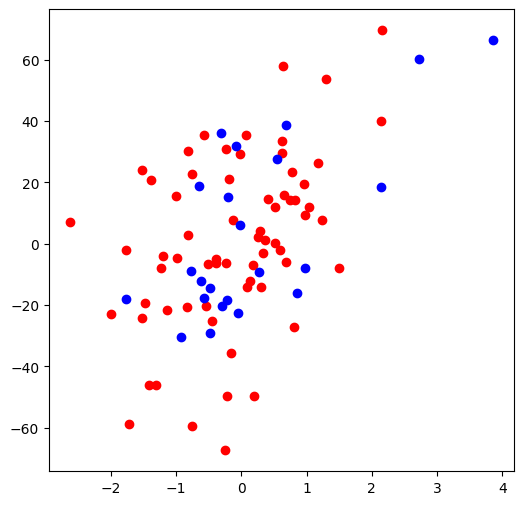

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(x_train[:,1:2],y_train,c='r')

plt.scatter(x_test[:,1:2],y_test,c='b')

In [ ]:
tf.random.set_seed(42)

reg = tf.keras.Sequential()
reg.add(tf.keras.layers.Dense(10,input_shape=[5]))
reg.add(tf.keras.layers.Dense(3))
reg.add(tf.keras.layers.Dense(1))

In [ ]:
reg.compile(loss = tf.keras.metrics.mae,
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['mae']
            )

reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 3)                 33        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# prompt: fit the model with the data

model = reg.fit(x_train,y_train,epochs=50,verbose=0)


In [91]:
reg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 3)                 33        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


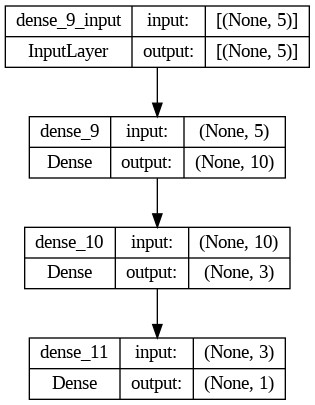

In [92]:
from tensorflow.keras.utils import plot_model

plot_model(reg, show_shapes=True)

In [93]:
y_preds = reg.predict(x_test)

1/1 [==============================] - 0s 19ms/step


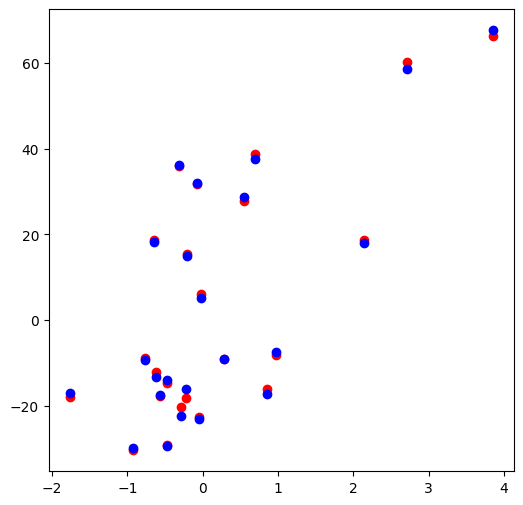

In [94]:
plt.figure(figsize=(6,6))

plt.scatter(x_test[:,1:2],y_test,c='r')

plt.scatter(x_test[:,1:2],y_preds,c='b')

In [95]:
tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=0.8095559>

In [96]:
reg.save("regression_NN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


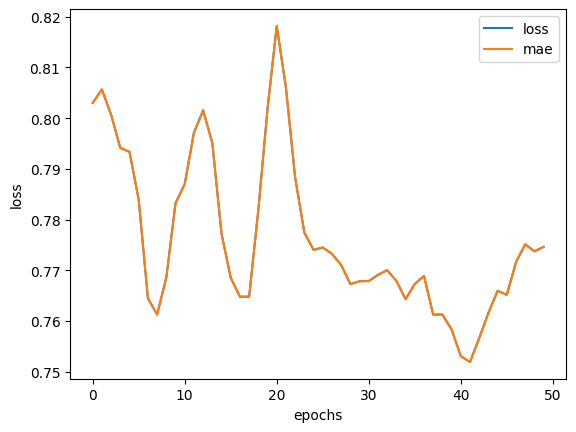

In [97]:
import pandas as pd

# model = tf.keras.models.load_model('regression_NN.h5')

pd.DataFrame(model.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");